# Q1

## (i)

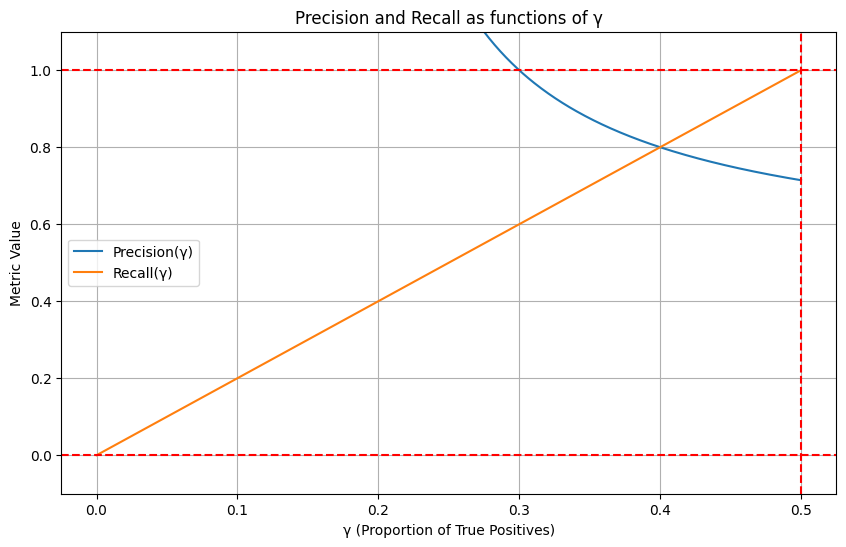

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define gamma range
gamma_range = np.linspace(0, 0.5, 500)
precision_values = gamma_range / (2 * gamma_range - 0.3)
precision_values = np.where(gamma_range > 0.15, precision_values, np.nan)


recall_values = (gamma_range) / 0.5

# Plotting Precision and Recall as functions of gamma
plt.figure(figsize=(10, 6))
plt.plot(gamma_range, precision_values, label='Precision(γ)')
plt.plot(gamma_range, recall_values, label='Recall(γ)')
plt.title('Precision and Recall as functions of γ')
plt.xlabel('γ (Proportion of True Positives)')
plt.ylabel('Metric Value')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.axhline(y=1.0, color='r', linestyle='--')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()





## (ii)

In [82]:
import pandas as pd
df = pd.concat([pd.DataFrame(gamma_range, columns=['Gamma']),pd.DataFrame(precision_values, columns=['Precision']), pd.DataFrame(recall_values, columns=['Recall'])], axis=1)

In [83]:
df

,Gamma,Precision,Recall
0,0.000000,NaN,0.000000
1,0.001002,NaN,0.002004
2,0.002004,NaN,0.004008
3,0.003006,NaN,0.006012
4,0.004008,NaN,0.008016
...,...,...,...
495,0.495992,0.716768,0.991984
496,0.496994,0.716142,0.993988
497,0.497996,0.715520,0.995992
498,0.498998,0.714901,0.997996


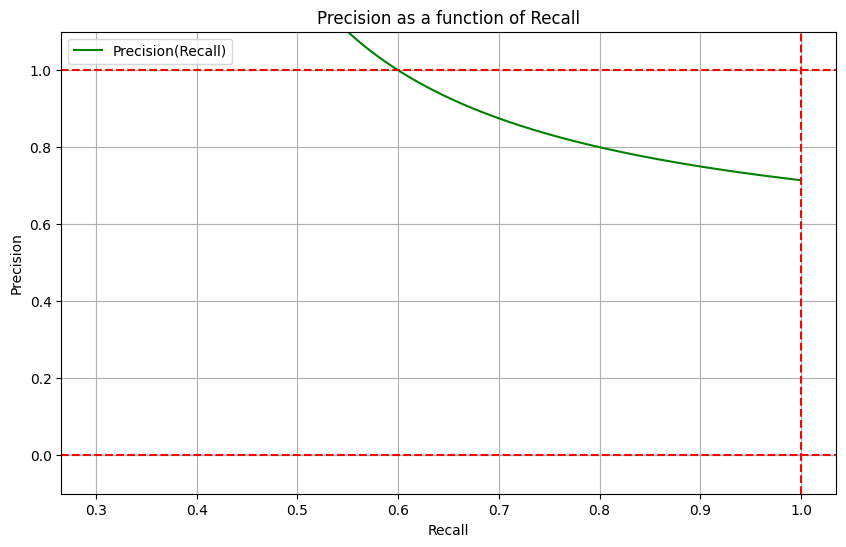

In [87]:
# Plotting Precision as a function of Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_values, precision_values, label='Precision(Recall)', color='g')
plt.axvline(x=1.0, color='r', linestyle='--')
plt.axhline(y=1.0, color='r', linestyle='--')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.ylim(-0.1, 1.1)
plt.title('Precision as a function of Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()


# Q2

Problem 2 (SMOTE-NC)

The file card_transdata.csv contains data on 1,000,000 credit card transactions. The goal is to it and test a model predicting whether a given transaction is fraudulent. Let the first 500,000 observations be the training set and the remaining observations be the test set.

Since the dataset contains both continuous and categorical features, while SMOTE can only handle continuous features, we use SMOTE-NC, a version of SMOTE that can handle both. In Python, use imblearn.over_sampling.SMOTENC. Do not forget to provide information about the categorical features to SMOTENC.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('W5_card_transdata-1.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [7]:
train_size = 500000

X = df.drop('fraud', axis=1)
y = df['fraud'].copy()

X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## (i) For each 𝛾 ∈ {0.1, 0.2, … , 1}, oversample the training set with the desired ratio 𝛾 of the number of samples in the minority class over the number of samples in the majority class. 

In [18]:
from imblearn.over_sampling import SMOTENC

categorical_features = [df.columns.get_loc(col) for col in df.drop('fraud', axis=1).columns if df[col].dtype == 'int64']

gamma_values = [i/10 for i in range(1, 11)]

resampled_data = {}

for gamma in gamma_values:
    smotenc = SMOTENC(categorical_features=categorical_features, sampling_strategy=gamma, random_state=123)
    
    X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)
    
    resampled_data[gamma] = (X_resampled, y_resampled)
    
    print(f'Resampled with gamma={gamma}: {X_resampled.shape[0]} samples, with {y_resampled.sum()} positive instances.')



Resampled with gamma=0.1: 501966 samples, with 45633 positive instances.
Resampled with gamma=0.2: 547599 samples, with 91266 positive instances.
Resampled with gamma=0.3: 593232 samples, with 136899 positive instances.
Resampled with gamma=0.4: 638866 samples, with 182533 positive instances.
Resampled with gamma=0.5: 684499 samples, with 228166 positive instances.
Resampled with gamma=0.6: 730132 samples, with 273799 positive instances.
Resampled with gamma=0.7: 775766 samples, with 319433 positive instances.
Resampled with gamma=0.8: 821399 samples, with 365066 positive instances.
Resampled with gamma=0.9: 867032 samples, with 410699 positive instances.
Resampled with gamma=1.0: 912666 samples, with 456333 positive instances.


## (ii) For each of the resulting oversampled datasets, fit a decision tree (with information gain as the feature selection criterion) and calculate its training and testing recall, precision, and 𝐹1 score.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score

evaluation_metrics1 = {}

for gamma in gamma_values:
   
    X_resampled, y_resampled = resampled_data[gamma]
    
    clf = DecisionTreeClassifier(criterion='entropy', random_state=123)
    
    # Fit the classifier to the resampled training data
    clf.fit(X_resampled, y_resampled)
    
    # Make predictions on the training and testing data
    y_train_pred = clf.predict(X_resampled)
    y_test_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for the training data
    train_recall = recall_score(y_resampled, y_train_pred)
    train_precision = precision_score(y_resampled, y_train_pred)
    train_f1 = f1_score(y_resampled, y_train_pred)
    
    # Calculate evaluation metrics for the testing data
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Store the evaluation metrics
    evaluation_metrics1[gamma] = {
        'train_recall': train_recall,
        'train_precision': train_precision,
        'train_f1': train_f1,
        'test_recall': test_recall,
        'test_precision': test_precision,
        'test_f1': test_f1
    }

evaluation_metrics1


{0.1: {'train_recall': 1.0,
  'train_precision': 1.0,
  'train_f1': 1.0,
  'test_recall': 0.9997256264861899,
  'test_precision': 0.9999313925034875,
  'test_f1': 0.9998284989081098},
 0.2: {'train_recall': 1.0,
  'train_precision': 1.0,
  'train_f1': 1.0,
  'test_recall': 0.9997256264861899,
  'test_precision': 0.9998856594022274,
  'test_f1': 0.9998056365403304},
 0.3: {'train_recall': 1.0,
  'train_precision': 1.0,
  'train_f1': 1.0,
  'test_recall': 0.9997256264861899,
  'test_precision': 0.9996799122044904,
  'test_f1': 0.9997027688227359},
 0.4: {'train_recall': 1.0,
  'train_precision': 1.0,
  'train_f1': 1.0,
  'test_recall': 0.9997027620267057,
  'test_precision': 0.9995427839882953,
  'test_f1': 0.9996227666068428},
 0.5: {'train_recall': 1.0,
  'train_precision': 1.0,
  'train_f1': 1.0,
  'test_recall': 0.9997942198646425,
  'test_precision': 0.9996799341578839,
  'test_f1': 0.9997370737450987},
 0.6: {'train_recall': 1.0,
  'train_precision': 1.0,
  'train_f1': 1.0,
  'test

## (iii) Draw a plot of training and testing 𝐹1 score as functions of 𝛾. Does using SMOTE-NC improve the decision tree’s performance?

The F1 scores with SMOTE-NC with gamma values greater than 0.1 is lower than the F1 score derived by using just decision tree without resampling the data. So regrading the decision tree performance, the SMOTE-NC doesn't improve the decision tree's performance. However, in the context of the case of detecting fraud, we may focus more on sensitivity regarding the modelperformance, so we need more analysis to determine the effect of using SMOTE-NC.

In [23]:
clf_original = DecisionTreeClassifier(criterion='entropy', random_state=123)

# Fit the classifier to the original training data
clf_original.fit(X_train, y_train)

# Make predictions on the original training and testing data
y_train_pred_original = clf_original.predict(X_train)
y_test_pred_original = clf_original.predict(X_test)

# Calculate evaluation metrics for the original training data
train_recall_original = recall_score(y_train, y_train_pred_original)
train_precision_original = precision_score(y_train, y_train_pred_original)
train_f1_original = f1_score(y_train, y_train_pred_original)

# Calculate evaluation metrics for the testing data
test_recall_original = recall_score(y_test, y_test_pred_original)
test_precision_original = precision_score(y_test, y_test_pred_original)
test_f1_original = f1_score(y_test, y_test_pred_original)

(train_recall_original, train_precision_original, train_f1_original,
 test_recall_original, test_precision_original, test_f1_original)



    

(1.0, 1.0, 1.0, 0.9997027620267057, 0.9999542595769011, 0.9998284949863367)

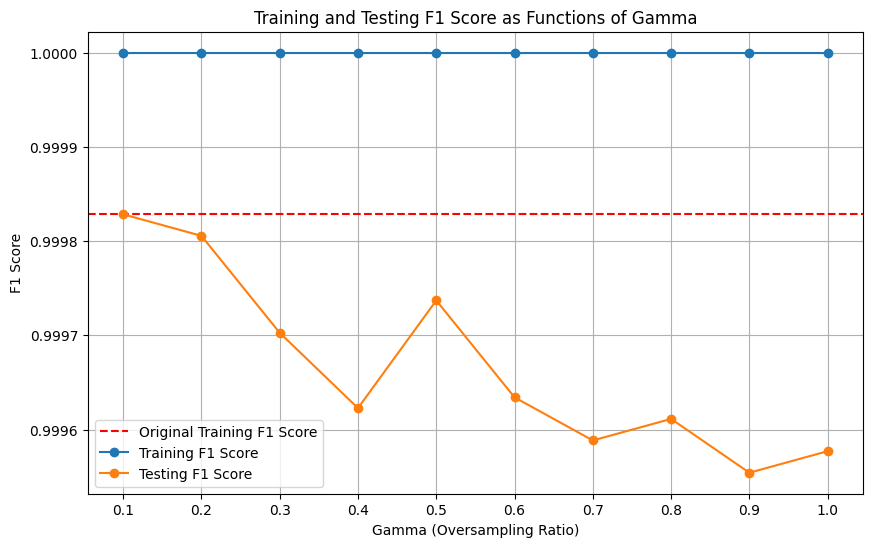

In [27]:
import matplotlib.pyplot as plt

# Lists to store the F1 scores for plotting
train_f1_scores = []
test_f1_scores = []

# Extract F1 scores for the training and testing sets
for gamma in gamma_values:
    train_f1_scores.append(evaluation_metrics1[gamma]['train_f1'])
    test_f1_scores.append(evaluation_metrics1[gamma]['test_f1'])

# Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.axhline(y=test_f1_original, color='r', linestyle='--', label='Original Training F1 Score')
plt.plot(gamma_values, train_f1_scores, marker='o', label='Training F1 Score')
plt.plot(gamma_values, test_f1_scores, marker='o', label='Testing F1 Score')

# Adding labels and title
plt.xlabel('Gamma (Oversampling Ratio)')
plt.ylabel('F1 Score')
plt.title('Training and Testing F1 Score as Functions of Gamma')
plt.xticks(gamma_values)
plt.legend()
plt.grid(True)
plt.show()